In [1]:
import requests
import json
import prettytable
import os
import pandas as pd
import dtale
import plotly.express as px 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup

## BLS_key

In [2]:
bls_key = os.environ.get('bls_key')

# The url for BLS API v2
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

# API key in config.py which contains: bls_key = 'key'
key = '?registrationkey={}'.format(bls_key)

# Survey Legend:
* Series ID    CEU0800000003
* Positions       Value           Field Name
* 1-2             CE              Prefix
* 3               U               Seasonal Adjustment Code
* 4-11		08000000	Supersector and Industry Codes
* 12-13           03(Wages)              Data Type Code    OR     01(Employment) 

## Real Estate Industry: AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES 2015 - 2021

In [7]:
# Series stored as a dictionary #CEU-Industry code-01
series_dict = {
    'CEU5553100003': 'AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES(Real Estate)',
    'CEU5553200003': 'AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES(Renting & Leasing)'} 

# Start year and end year
dates = ('2015', '2021')

In [8]:
# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']

KeyError: 'series'

In [9]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.tail()

NameError: name 'p' is not defined

In [6]:
# Simple line plot of the data
df.plot(title='Utilities: AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES 15-21')

NameError: name 'df' is not defined

## Utilities Industry: All employees, thousands, utilities, seasonally adjusted 2019 - 2021

In [81]:
# Series stored as a dictionary #CEU-Industry code-03 (Employment Survey)
series_dict = {
    'CES4422000001': 'All employees, thousands, utilities, seasonally adjusted'} 

# Start year and end year
dates = ('2019', '2021')

In [82]:
# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']


In [83]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.tail()

,"All employees, thousands, utilities, seasonally adjusted"
2021-07-01,538.9
2021-08-01,536.7
2021-09-01,536.4
2021-10-01,536.5
2021-11-01,536.1


<AxesSubplot:title={'center':'Utilities: All employees, thousands, utilities, seasonally adjusted'}>

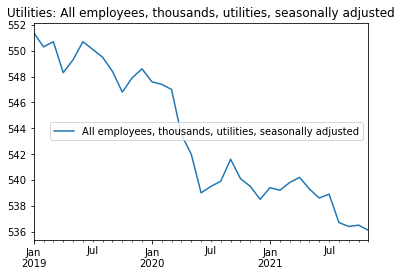

In [84]:
# Simple line plot of the data
df.plot(title='Utilities: All employees, thousands, utilities, seasonally adjusted')